## Spring 8 Nivel 1: ¿Que no te cuantifico?...

Usaremos los datos de deporte anteriores para dar valores númericos a variables cualitativas.


In [151]:
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns


In [152]:
archivos=list()
for i in range(31):
    archivos.append("SP1("+str(i)+").csv")
print(archivos)

['SP1(0).csv', 'SP1(1).csv', 'SP1(2).csv', 'SP1(3).csv', 'SP1(4).csv', 'SP1(5).csv', 'SP1(6).csv', 'SP1(7).csv', 'SP1(8).csv', 'SP1(9).csv', 'SP1(10).csv', 'SP1(11).csv', 'SP1(12).csv', 'SP1(13).csv', 'SP1(14).csv', 'SP1(15).csv', 'SP1(16).csv', 'SP1(17).csv', 'SP1(18).csv', 'SP1(19).csv', 'SP1(20).csv', 'SP1(21).csv', 'SP1(22).csv', 'SP1(23).csv', 'SP1(24).csv', 'SP1(25).csv', 'SP1(26).csv', 'SP1(27).csv', 'SP1(28).csv', 'SP1(29).csv', 'SP1(30).csv']


In [153]:
datos_liga=pd.read_csv("./datos/"+archivos[0])

In [154]:
for i in range(1,25):
    temp=pd.read_csv("./datos/"+archivos[i])
    datos_liga=datos_liga.append(temp,ignore_index=True)

In [155]:
datos_liga.describe


<bound method NDFrame.describe of       Div        Date   Time     HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  \
0     SP1  13/08/2021  20:00     Valencia       Getafe     1     0   H     1   
1     SP1  14/08/2021  18:30        Cadiz      Levante     1     1   D     0   
2     SP1  14/08/2021  18:30     Mallorca        Betis     1     1   D     1   
3     SP1  14/08/2021  21:00       Alaves  Real Madrid     1     4   A     0   
4     SP1  14/08/2021  21:00      Osasuna      Espanol     0     0   D     0   
...   ...         ...    ...          ...          ...   ...   ...  ..   ...   
9495  SP1    18/05/08    NaN  Real Madrid      Levante     5     2   H     3   
9496  SP1    18/05/08    NaN   Recreativo   Valladolid     1     1   D     0   
9497  SP1    18/05/08    NaN    Santander      Osasuna     1     0   H     0   
9498  SP1    18/05/08    NaN      Sevilla   Ath Bilbao     4     1   H     1   
9499  SP1    18/05/08    NaN     Valencia   Ath Madrid     3     1   H     2   

     

### Definiendo la pregunta.

En este caso nos preguntaremos , de todas las temporadas archivadas que tenemos ¿Quien sería el mejor equipo , el más regular?  
Para responder a esta pregunta usaremos la columna _FTR_.  
Los valores de la columna _FTR_ nos indican de forma cualitativa el resultado del partido:
 H=Victoria del equipo local  
 D= empate  
 A=Victoria del equipo visitante  
A estas variable les asignaremos un valor númerico, según la norma actual, de 3 puntos para el equipo que gana , 1 por empate y 0 para el que pierde.


#### Seleccionando datos

Como venimos haciendo nos olvidamos de toda la sección de apuestas , no nos interesan ni fechas ni horarios, y solo tenemos interés por los resultados finales. con todo ello crearemos un nuevo DataFrame con los campos que nos sean útiles para nuestros objetivos.

In [156]:
datos_puntos_totales=datos_liga[["HomeTeam","AwayTeam","FTR"]]


In [157]:
datos_puntos_totales.dtypes


HomeTeam    object
AwayTeam    object
FTR         object
dtype: object

In [158]:
datos_puntos_totales=pd.get_dummies(datos_puntos_totales,columns=["FTR"])

Con esto obtendremos una _"tabla de la verdad"_ de nuestra variable, de hecho podríamos ahorrarnos una de ellas ya que al ser complemetarias , si dos de las otras tiene valor 0 el valor de la restante debe ser 1.No lo haremos así para simplificar.


Para responder a nuestra pregunta podemos obtar por 2 estrategias:
    
    1-Transformar las nueas columnas a boolean , y con estas tablas de la verdad , ir operando/filtrando los valores hasta responder la pregunta.
    2-Cambiar las variables númericas a unas que nos interesen más y trabajar directamente con las columnas.

En un proyecto más complejo y con más variables , la primera opción seguramente nos daría mas posibilidades de análisis. En nuestro caso particular , es más sencillo la via directa de la segunda opción.



In [159]:
datos_puntos_totales.describe

<bound method NDFrame.describe of          HomeTeam     AwayTeam  FTR_A  FTR_D  FTR_H
0        Valencia       Getafe      0      0      1
1           Cadiz      Levante      0      1      0
2        Mallorca        Betis      0      1      0
3          Alaves  Real Madrid      1      0      0
4         Osasuna      Espanol      0      1      0
...           ...          ...    ...    ...    ...
9495  Real Madrid      Levante      0      0      1
9496   Recreativo   Valladolid      0      1      0
9497    Santander      Osasuna      0      0      1
9498      Sevilla   Ath Bilbao      0      0      1
9499     Valencia   Ath Madrid      0      0      1

[9500 rows x 5 columns]>

En los partidos ganados , reemplazamos los unos por 3 :

In [160]:
datos_puntos_totales["FTR_A"]=datos_puntos_totales["FTR_A"].replace([1],[3])

In [161]:
datos_puntos_totales["FTR_H"]=datos_puntos_totales["FTR_H"].replace([1],[3])

In [162]:
datos_puntos_totales.describe

<bound method NDFrame.describe of          HomeTeam     AwayTeam  FTR_A  FTR_D  FTR_H
0        Valencia       Getafe      0      0      3
1           Cadiz      Levante      0      1      0
2        Mallorca        Betis      0      1      0
3          Alaves  Real Madrid      3      0      0
4         Osasuna      Espanol      0      1      0
...           ...          ...    ...    ...    ...
9495  Real Madrid      Levante      0      0      3
9496   Recreativo   Valladolid      0      1      0
9497    Santander      Osasuna      0      0      3
9498      Sevilla   Ath Bilbao      0      0      3
9499     Valencia   Ath Madrid      0      0      3

[9500 rows x 5 columns]>

Ahora sumaremos la columna de empate a las otras 2 y tendremos los puntos de cada partido de los equipos visitantes y locales

In [163]:
datos_puntos_totales["FTR_A"]=datos_puntos_totales["FTR_A"]+datos_puntos_totales["FTR_D"]

In [164]:
datos_puntos_totales["FTR_H"]=datos_puntos_totales["FTR_H"]+datos_puntos_totales["FTR_D"]

In [165]:
datos_puntos_totales.describe

<bound method NDFrame.describe of          HomeTeam     AwayTeam  FTR_A  FTR_D  FTR_H
0        Valencia       Getafe      0      0      3
1           Cadiz      Levante      1      1      1
2        Mallorca        Betis      1      1      1
3          Alaves  Real Madrid      3      0      0
4         Osasuna      Espanol      1      1      1
...           ...          ...    ...    ...    ...
9495  Real Madrid      Levante      0      0      3
9496   Recreativo   Valladolid      1      1      1
9497    Santander      Osasuna      0      0      3
9498      Sevilla   Ath Bilbao      0      0      3
9499     Valencia   Ath Madrid      0      0      3

[9500 rows x 5 columns]>

Separamos en dos _df_ según sea local o visitante y operamos con las columnas. Después sólo nos queda volver a unir toda la información y agruparla por equipos.

In [166]:
resultados_local=datos_puntos_totales[["HomeTeam","FTR_H"]]
resultados_visit=datos_puntos_totales[["AwayTeam","FTR_A"]]
resultados_local=resultados_local.rename(columns={"HomeTeam":"Equipo","FTR_H":"Puntos"})
resultados_visit=resultados_visit.rename(columns={"AwayTeam":"Equipo","FTR_A":"Puntos"})

In [167]:
resultados_local.describe

<bound method NDFrame.describe of            Equipo  Puntos
0        Valencia       3
1           Cadiz       1
2        Mallorca       1
3          Alaves       0
4         Osasuna       1
...           ...     ...
9495  Real Madrid       3
9496   Recreativo       1
9497    Santander       3
9498      Sevilla       3
9499     Valencia       3

[9500 rows x 2 columns]>

In [168]:
clasificacion=pd.concat([resultados_local,resultados_visit],ignore_index=True)


In [169]:
clasificacion.describe

<bound method NDFrame.describe of            Equipo  Puntos
0        Valencia       3
1           Cadiz       1
2        Mallorca       1
3          Alaves       0
4         Osasuna       1
...           ...     ...
18995     Levante       0
18996  Valladolid       1
18997     Osasuna       0
18998  Ath Bilbao       0
18999  Ath Madrid       0

[19000 rows x 2 columns]>

resultados_local_2=datos_puntos_totales.groupby(["HomeTeam"]).sum()

In [170]:
clasificacion=clasificacion.groupby(["Equipo"]).sum()


In [171]:
clasificacion.sort_values(by=["Puntos"],ascending=False)[:10]

,Puntos
Equipo,
Barcelona,2219
Real Madrid,2185
Ath Madrid,1843
Sevilla,1578
Valencia,1457
Villarreal,1365
Ath Bilbao,1340
Sociedad,1196
Getafe,1045


### Estandarizando
Cogemos los datos que habiamos empleado en el Spring 7 para nuestras hipótesis.

In [172]:
datos_hipotesis=datos_liga[["FTHG","FTAG"]]
datos_hipotesis=datos_hipotesis.rename(columns={"FTHG":"Goles Local","FTAG":"Goles visitante"})
datos_hipotesis["dif_goles"]=datos_liga["FTHG"]-datos_liga["FTAG"]


In [173]:
datos_hipotesis.describe()

,Goles Local,Goles visitante,dif_goles
count,9500.000000,9500.000000,9500.000000
mean,1.571789,1.135684,0.436105
std,1.352731,1.145858,1.831237
min,0.000000,0.000000,-8.000000
25%,1.000000,0.000000,-1.000000
50%,1.000000,1.000000,0.000000
75%,2.000000,2.000000,1.000000
max,10.000000,8.000000,8.000000


En el ejercicio del Spring7 , partimos de la suposición de que nuestra distribución era asumible a una distribución normal.  
El tratamiento más correcto hubiera sido proceder a estandarizar los datos , es decir aplicar unos factores a los datos para que tuvieramos una distribución normal y , por lo tanto pudieramos usar las herramietnas estadísticas correctamente.

Esta Estandarizacion la conseguiriamos a traves de la fórmula :  
    normalización = ( x – media ) / desviación típica
Como podemos deducir de la formula, esta transformacion hace que los datos se centren en el 0 y que la desviación se equipare a 1.Para ello usaremos la función _"StandardScaler"_ de l alibreria sklearn.


Creamos una matriz de factores para convertir nuestros datos en una distrubucion normal

In [174]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(datos_hipotesis)
scaler

StandardScaler()

In [175]:
scaler.mean_

array([1.57178947, 1.13568421, 0.43610526])

In [176]:
scaler.scale_


array([1.35265974, 1.14579795, 1.83114045])

Aplicamos los factores y comprobamos que se ha producido la estandarización (media a pasado a ser 0 y la desviación standard 1).

In [177]:
x_scaled=scaler.transform(datos_hipotesis)

In [178]:
x_scaled.mean(axis=0)

array([-9.87280433e-17, -7.47939722e-17, -8.04035201e-18])

In [179]:
x_scaled.std(axis=0)

array([1., 1., 1.])

Lo representamos gráficamente:

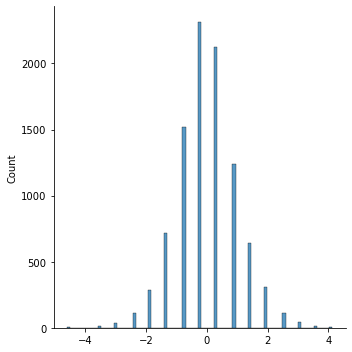

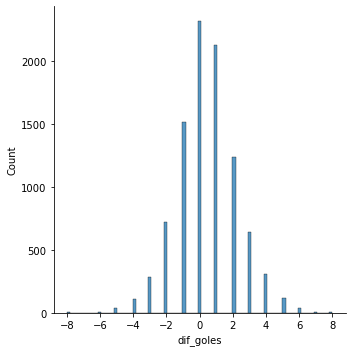

In [180]:
sns.displot(x_scaled[:,2])
sns.displot(datos_hipotesis["dif_goles"])



No se observa una gran diferencia , lo cual apoya nuestra aproximación en el Spring7 acerca de que era una distribución _cuasi-normal_. Lo que si podemos observar es como la distribución de los datos se han desplazado para que se centre en el 0.  
La estandarización no sólo nos permite "transformar" nuestra distibución , especialmente si es gaussiana,a una distribución normal y así poder usar ciertas herramientas estadisticas ,sino  que, también nos permite combinar conjuntamente datos/variables de diferentes procedencias ,dotándolas de cierta homogeneidad que permita trabajar con ellas.